In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In this notebook I am going to scrap IPL 2020 dataset with just few lines of code.So getting started towards it I am going to scrap two tables of IPL 2020 one is of point table of IPL teams and the another one is runs made by each player in IPL.Below are the table images which we are going to scrap.

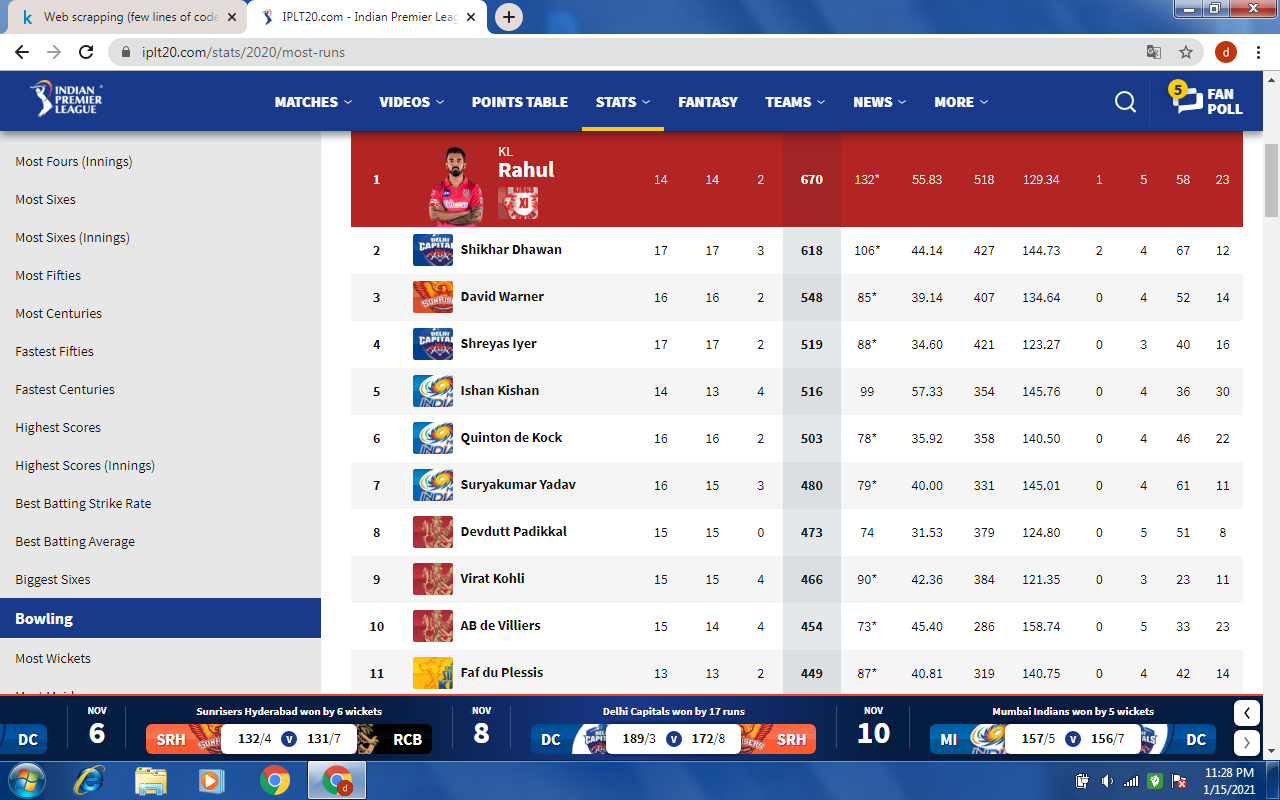

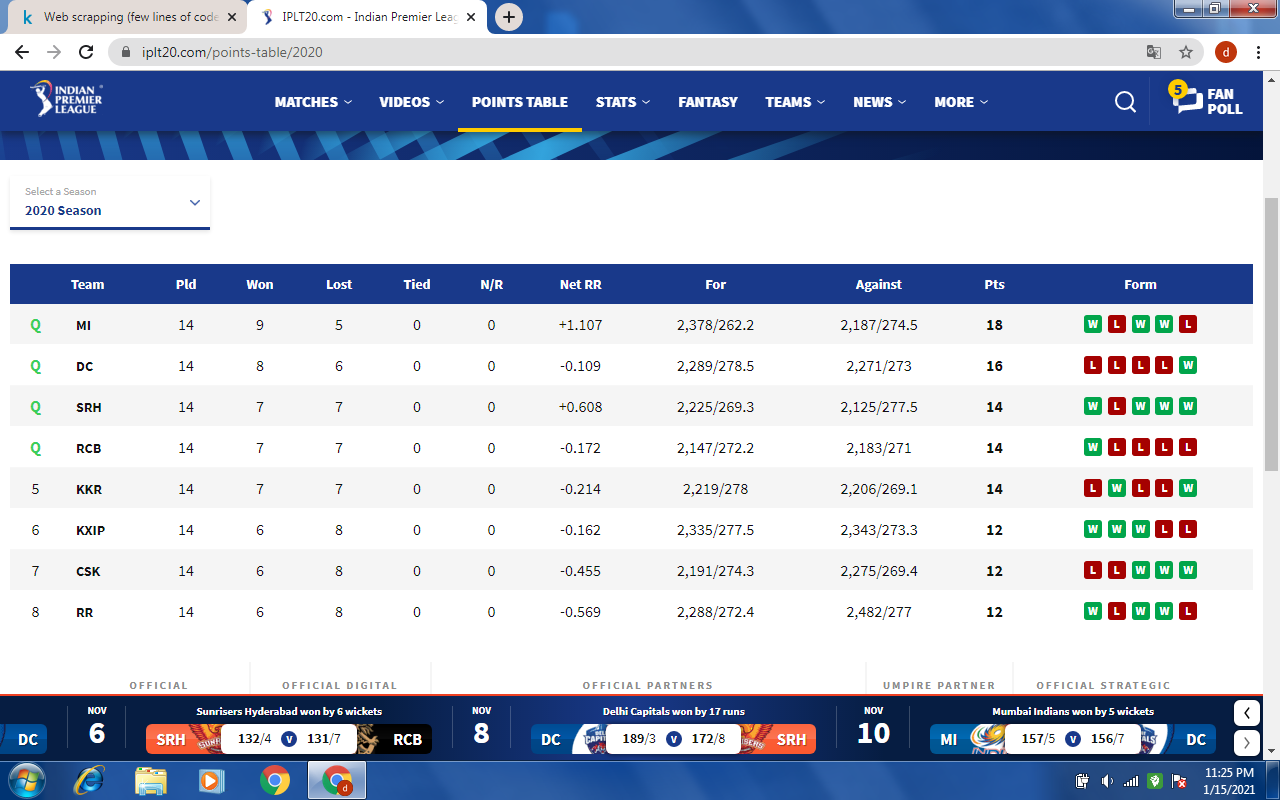

First of all we have to import all the required libraries

# Import Libraries

In [ ]:
# import required libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# First dataset

In [ ]:
# getting url of the scrapping dataset
url = 'https://www.iplt20.com/stats/2019/most-runs'

Now we are going to read HTML webpage using read_html()

In [ ]:
df = pd.read_html(url,header=0)

In [ ]:
df

Now checking number of tables in our dataset

In [ ]:
len(df)

So we have only 1 table in our dataset also on https://www.iplt20.com/stats/2020/most-runs .So now we are going to select that one table and load it

In [ ]:
# selecting that one table
df2020_players_run = df[0]

In [ ]:
# load the dataset
df2020_players_run

Let's quikly check how our dataset looks like with a magic function .info() which tells us null values , dtype and shape of the dataset

In [ ]:
df2020_players_run.info()

# Cleaning the dataset

From above we can see that in HS column their is * which is unwanted so we are going to remove that

In [ ]:
# remove '*' from HS column
df2020_players_run['HS'] = df2020_players_run['HS'].map(lambda x : x.rstrip('*'))

In Avg column their are '-' in place of NaN value.So we will replace '-' to NaN and then will convert the dtype of the column.

In [ ]:
df2020_players_run['Avg'].replace({'-':'NaN'},inplace=True)

Changing the dtype of HS and Avg column to integer and float respectively

In [ ]:
# chaning dtype
convert_dict = {'HS': int , 'Avg' : float }

df2020_players_run = df2020_players_run.astype(convert_dict)

**So here we are ,finally we have scraped the first table in just few lines of code also we have cleaned it up.Now we are going to scrap another table from https://www.iplt20.com/points-table/2020n** 

# Second Dataset

So we already have scraped the first table from the specified URL.Now we will going to follow the same steps to scrap this table

In [ ]:
# specify the url
url2 = 'https://www.iplt20.com/points-table/2020'

# read html page
df_2 = pd.read_html(url2,header=0)
df_2

In [ ]:
# we also have only 1 table (you can see it by clicking on the url)
# selecting that one table
df2020_team = df_2[0]

# load the dataset
df2020_team

In [ ]:
# some basic info
df2020_team.info()

We don't have any null value in this dataset but we can see that we have a column named 'Unnamed: 0' which we do not require.So we are going to drop this column

In [ ]:
df2020_team.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# after dropping the column
df2020_team.head()

**If you like this notebook don't foget to upvote it :)**